<a href="https://www.kaggle.com/code/rubanzasilva/eda-fast-ai-neural-nets-gradient-boosting?scriptVersionId=256632977" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Binary Classification on a Bank Dataset 

In this competition, we are tasked with predicting whether a client will subscribe to a term deposit.

Per Investopedia, a [bank term deposit](https://www.investopedia.com/terms/t/termdeposit.asp) is a bank savings product where funds are committed to a financial institution for a certain duration. Here, you agree to deposit a specific amount of money for a predetermined period of time in exchange for a guaranteed interest rate.

This interest rate is usually higher than that given on a regular savings account because you are giving up liquidity. The trade-off is simple: you sacrifice immediate access to your money in exchange for higher, guaranteed returns. Banks can offer better rates because they know exactly how long they'll have your funds to lend out to other customers.

## Library & Data Import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e8/sample_submission.csv
/kaggle/input/playground-series-s5e8/train.csv
/kaggle/input/playground-series-s5e8/test.csv


In [2]:
%%time
%pip install catboost
%pip install optuna
#%pip install optuna_distributed
#%pip install openfe
%pip install seaborn
%pip install xgboost
%pip install lightgbm
%pip install fastkaggle
#%pip install h2o
%pip install -Uqq fastbook
#%pip install polars
%pip install -q -U autogluon.tabular
%pip install autogluon
%pip install --upgrade pip
%pip install tqdm
#%pip install wandb
#%pip install sweetviz
%pip install xlearn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.1/124.1 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.9/246.9 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

The latest version of AutoGluon appears to have a compatibility issue with the latest versions of NumPy, so for now, I will downgrade NumPy to a known working version.

In [3]:
#%pip install -U autogluon > /dev/null
# In your terminal/command prompt
#pip install numpy==1.24.3
# or
%pip install numpy==1.23.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 104.4 MB/s  0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
autogluon-core 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-tabular 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-multimodal 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-common 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-features 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is

In [4]:
# Update to compatible versions
!pip install autogluon==1.1.1 xgboost==2.0.3
# Restart kernel after installation

  Using cached packaging-24.2-py3-none-any.whl.metadata (3.2 kB)
INFO: pip is looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of google-api-core to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 37.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 61.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.5/808.5 kB 26.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 71.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.3/812.3 kB 24.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 MB 84.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 123.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 123.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
#%pip freeze > requirements.txt

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import random
from tqdm import tqdm

#import fastbook
#fastbook.setup_book()
#from fastbook import *
from fastai.tabular.all import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import random
from tqdm import tqdm
from ipywidgets import interact

from fastai.imports import *
np.set_printoptions(linewidth=130)


from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import VotingClassifier,StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,StratifiedKFold, cross_val_score,train_test_split,GridSearchCV


from pathlib import Path
import os

import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier

import lightgbm as lgb
from lightgbm import LGBMClassifier

from catboost import CatBoostClassifier,CatBoostRegressor,Pool, metrics, cv


import warnings


#from openfe import OpenFE, transform
from autogluon.tabular import TabularDataset, TabularPredictor

#import h2o
#from h2o.automl import H2OAutoML

import gc

import optuna
from optuna.samplers import TPESampler

import pickle
from joblib import dump, load
#import sweetviz as sv
#from IPython.display import FileLink

#import h2o
#from h2o.automl import H2OAutoML
import xlearn as xl

In [7]:
path = Path('/kaggle/input/playground-series-s5e8/')
path

Path('/kaggle/input/playground-series-s5e8')

In [8]:
train_df = pd.read_csv(path/'train.csv',index_col='id')
test_df = pd.read_csv(path/'test.csv',index_col='id')
sub_df = pd.read_csv(path/'sample_submission.csv')

In [9]:
!ls /kaggle/input/playground-series-s5e8

sample_submission.csv  test.csv  train.csv


In [10]:
train_df.shape

(750000, 17)

## Exploratory Data Analysis

In [11]:
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
id,,,,,,,,,,,,,,,,,
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   age        750000 non-null  int64 
 1   job        750000 non-null  object
 2   marital    750000 non-null  object
 3   education  750000 non-null  object
 4   default    750000 non-null  object
 5   balance    750000 non-null  int64 
 6   housing    750000 non-null  object
 7   loan       750000 non-null  object
 8   contact    750000 non-null  object
 9   day        750000 non-null  int64 
 10  month      750000 non-null  object
 11  duration   750000 non-null  int64 
 12  campaign   750000 non-null  int64 
 13  pdays      750000 non-null  int64 
 14  previous   750000 non-null  int64 
 15  poutcome   750000 non-null  object
 16  y          750000 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 103.0+ MB


In [13]:
train_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [14]:
missing_values_count = train_df.isnull().sum()
sorted_missing_values = missing_values_count.sort_values(ascending=False)
print(sorted_missing_values)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [15]:
#Missing values returned as percentages.
missing_percentages = train_df.isnull().mean() * 100
sorted_missing_percentages = missing_percentages.sort_values(ascending=False)
print(sorted_missing_percentages)

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64


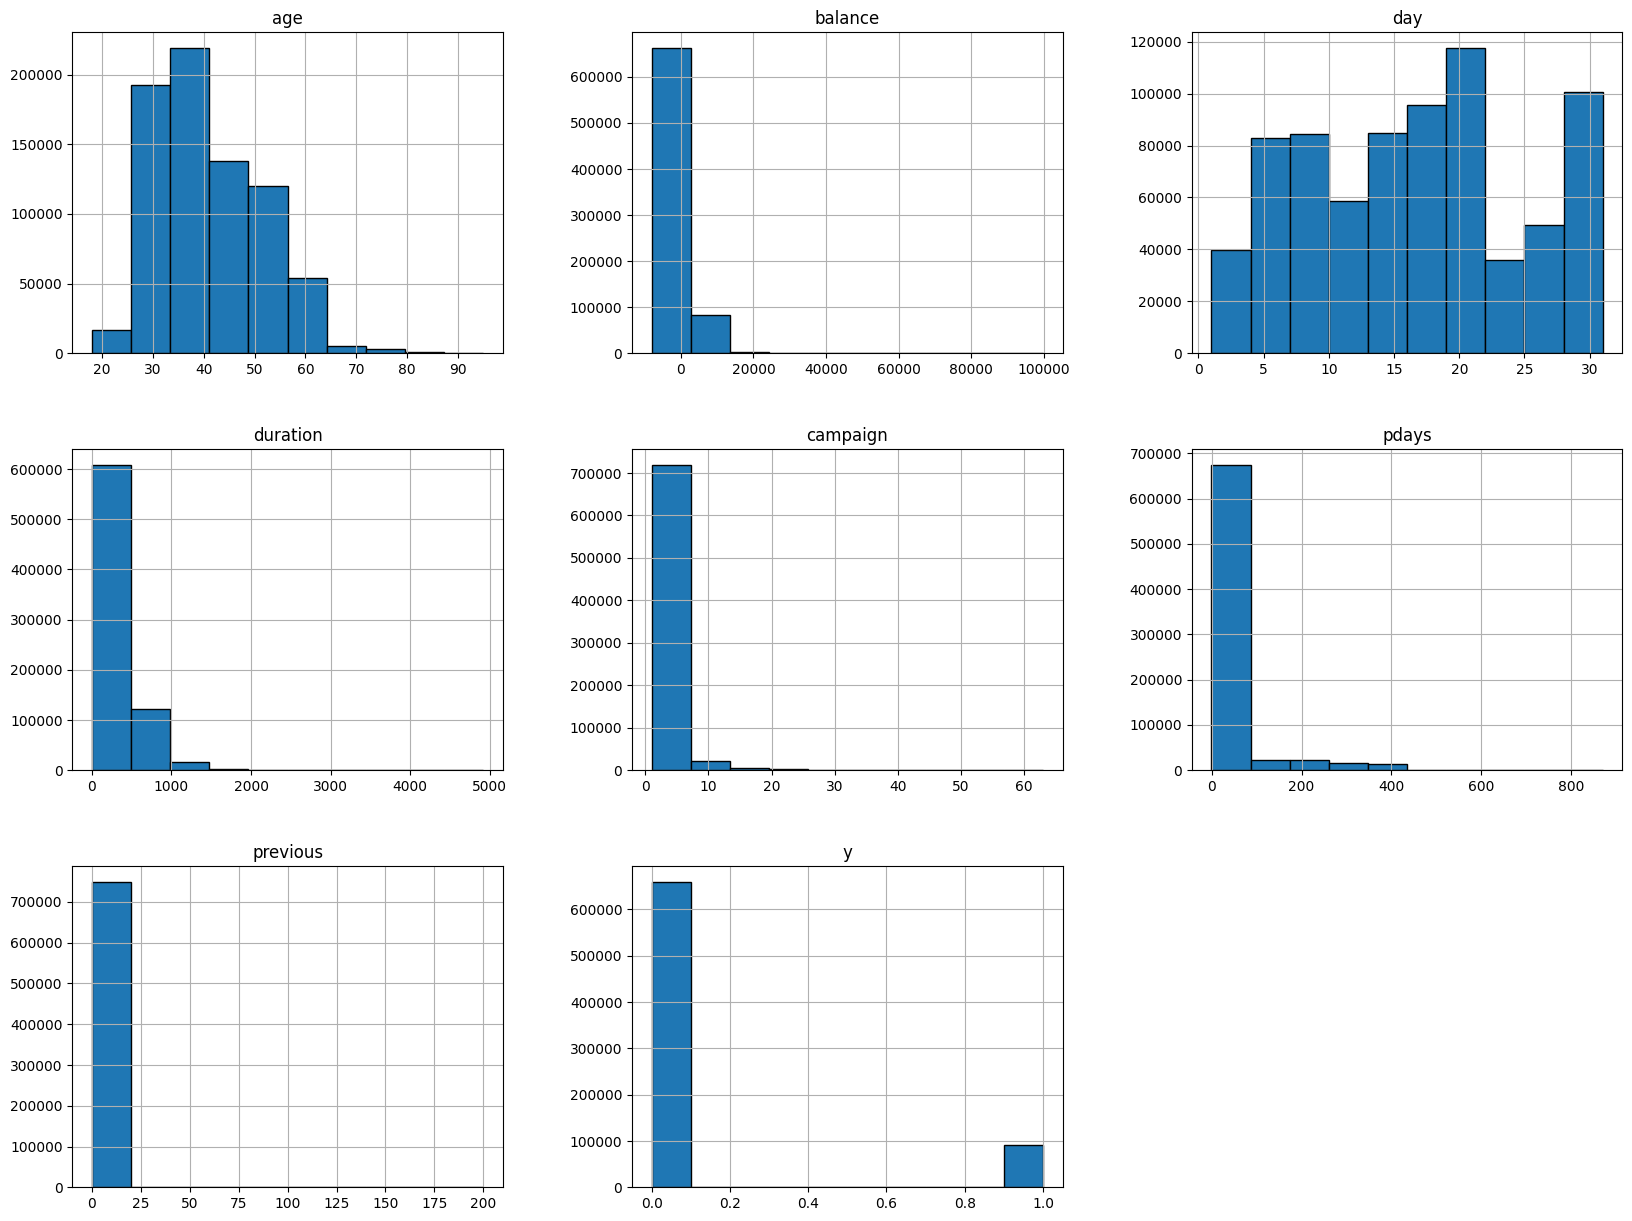

In [16]:
train_df.hist(figsize=(20,15),edgecolor='black');

In [17]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,750000.0,40.926395,10.098829,18.0,33.0,39.0,48.0,95.0
balance,750000.0,1204.067397,2836.096759,-8019.0,0.0,634.0,1390.0,99717.0
day,750000.0,16.117209,8.250832,1.0,9.0,17.0,21.0,31.0
duration,750000.0,256.229144,272.555662,1.0,91.0,133.0,361.0,4918.0
campaign,750000.0,2.577008,2.718514,1.0,1.0,2.0,3.0,63.0
pdays,750000.0,22.412733,77.319998,-1.0,-1.0,-1.0,-1.0,871.0
previous,750000.0,0.298545,1.335926,0.0,0.0,0.0,0.0,200.0
y,750000.0,0.120651,0.325721,0.0,0.0,0.0,0.0,1.0


## Prepare Data for training

In [18]:
splits = RandomSplitter(valid_pct=0.2)(range_of(train_df))

In [19]:
#train_df = pd.concat([train_df, original_df], ignore_index=True)

In [20]:
cont_names,cat_names = cont_cat_split(train_df, dep_var='y')
#splits = RandomSplitter(valid_pct=0.2)(range_of(train_df))
to = TabularPandas(train_df, procs=[Categorify, FillMissing,Normalize],
#to = TabularPandas(train_df, procs=[Categorify,Normalize],
                   cat_names = cat_names,
                   cont_names = cont_names,
                   y_names='y',
                   y_block=CategoryBlock(),
                   splits=splits)
dls = to.dataloaders(bs=64)
#dls = to.dataloaders(bs=1024)
test_dl = dls.test_dl(test_df)

X_train, y_train = to.train.xs, to.train.ys.values.ravel()
X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()

In [21]:
cont_names,len(cont_names)

(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], 7)

In [22]:
cat_names, len(cat_names)

(['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'poutcome'],
 9)

In [23]:
X_train

,job,marital,education,default,housing,loan,contact,month,poutcome,age,balance,day,duration,campaign,pdays,previous
id,,,,,,,,,,,,,,,,
19968,5,2,3,1,1,2,1,2,4,0.007759,-0.468299,1.562063,-0.672593,-0.212363,-0.302920,-0.222699
58327,2,2,1,1,2,1,3,7,4,-0.487392,0.126498,-1.710509,-0.426876,-0.212363,-0.302920,-0.222699
431745,2,2,2,1,2,1,3,9,4,-0.784482,0.669021,1.562063,1.278474,-0.212363,-0.302920,-0.222699
594456,8,2,2,1,2,1,1,1,4,0.106789,1.683074,1.683269,-0.613914,-0.580493,-0.302920,-0.222699
406068,2,2,1,1,1,1,1,1,4,0.998061,19.860428,-0.134826,3.335897,0.523897,-0.302920,-0.222699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176587,10,2,3,1,1,1,1,10,4,-0.289331,-0.180084,0.350000,-0.533231,-0.212363,-0.302920,-0.222699
399737,8,2,1,1,2,1,1,9,2,-1.279633,-0.339380,-0.256032,1.014420,0.523897,4.511373,1.267759
689714,5,2,3,1,1,1,1,2,4,-0.586422,-0.425915,1.077238,-0.624917,0.155767,-0.302920,-0.222699


Below we define a function to help us do stratified kfold cross validation which we use below

In [24]:
def cross_val_predict(model, X_train, y_train, X_test, n_splits=5, random_state=42, 
                       return_proba=True, scoring='roc_auc', verbose=True):
    """
    Generic cross-validation function that works with ANY sklearn-compatible model.
    
    Parameters:
    - model: INSTANTIATED model object (e.g., xgb.XGBClassifier(n_estimators=100))
    - X_train, y_train: training data and labels
    - X_test: test data for final predictions
    - n_splits: number of CV folds
    - random_state: random seed for reproducibility
    - return_proba: if True, return probabilities; if False, return class predictions
    - scoring: metric to use ('roc_auc', 'accuracy')
    - verbose: print progress
    
    Returns:
    - oof_predictions: out-of-fold predictions on training set
    - test_predictions: predictions on test set (averaged across folds)
    - mean_score: mean score across folds
    - fold_scores: list of scores for each fold
    """
    from sklearn.model_selection import StratifiedKFold
    from sklearn.metrics import accuracy_score, roc_auc_score
    from sklearn.base import clone
    import numpy as np
    
    # Initialize stratified k-fold
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    # Initialize arrays to store results
    if return_proba:
        oof_predictions = np.zeros(len(X_train))
        test_predictions = np.zeros(len(X_test))
    else:
        oof_predictions = np.zeros(len(X_train), dtype=int)
        test_predictions = np.zeros(len(X_test))
    
    fold_scores = []
    
    # Perform cross-validation
    for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train), 1):
        if verbose:
            print(f"Training fold {fold}/{n_splits}...")
        
        # Split data for current fold
        X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
        
        # Clone the model to avoid interference between folds
        model_fold = clone(model)
        
        # Train model on current fold
        model_fold.fit(X_fold_train, y_fold_train)
        
        # Get predictions based on return_proba setting
        if return_proba:
            # Get probabilities for positive class
            y_pred_proba = model_fold.predict_proba(X_fold_val)[:, 1]
            oof_predictions[val_index] = y_pred_proba
            test_predictions += model_fold.predict_proba(X_test)[:, 1] / n_splits
            
            # Calculate score
            if scoring == 'roc_auc':
                cv_score = roc_auc_score(y_fold_val, y_pred_proba)
            else:  # accuracy
                y_pred_fold = (y_pred_proba > 0.5).astype(int)
                cv_score = accuracy_score(y_fold_val, y_pred_fold)
        else:
            # Get class predictions
            y_pred_fold = model_fold.predict(X_fold_val)
            oof_predictions[val_index] = y_pred_fold
            test_predictions += model_fold.predict(X_test) / n_splits
            cv_score = accuracy_score(y_fold_val, y_pred_fold)
        
        fold_scores.append(cv_score)
        if verbose:
            print(f"Fold {fold} {scoring}: {cv_score:.6f}")
    
    # Round test predictions if using hard predictions
    if not return_proba:
        test_predictions = np.round(test_predictions).astype(int)
    
    # Calculate mean score
    mean_score = np.mean(fold_scores)
    if verbose:
        print(f"\nMean {scoring}: {mean_score:.6f}")
    
    return oof_predictions, test_predictions, mean_score, fold_scores


# =============================================================================
# USAGE EXAMPLES WITH DIFFERENT MODELS
# =============================================================================

# Example: CatBoost (if installed)
"""
cat_model = CatBoostClassifier(
    iterations=100,
    depth=6,
    learning_rate=0.1,
    random_state=42,
    verbose=False
)

cat_oof, cat_test, cat_auc, cat_scores = cross_val_predict(
    model=cat_model,
    X_train=X_train,
    y_train=y_train, 
    X_test=X_test,
    return_proba=True,
    scoring='roc_auc'
)
"""

# =============================================================================
# ENSEMBLE ALL MODELS
# =============================================================================
"""
print("Individual Model Performance:")
print(f"XGBoost AUC: {xgb_auc:.6f}")
print(f"Random Forest AUC: {rf_auc:.6f}")
print(f"LightGBM AUC: {lgb_auc:.6f}")

# Simple ensemble
ensemble_oof = (xgb_oof + rf_oof + lgb_oof) / 3
ensemble_test = (xgb_test + rf_test + lgb_test) / 3

ensemble_auc = roc_auc_score(y_train, ensemble_oof)
print(f"\nEnsemble AUC: {ensemble_auc:.6f}")

# Create submission
submission = pd.DataFrame({
    'id': test_df.index,
    'Depression': ensemble_test
})
submission.to_csv('ensemble_submission.csv', index=False)

print(f"\nShapes:")
print(f"OOF predictions: {ensemble_oof.shape} (training data)")
print(f"Test predictions: {ensemble_test.shape} (test data)")
print("Different shapes = different datasets!")
"""

'\nprint("Individual Model Performance:")\nprint(f"XGBoost AUC: {xgb_auc:.6f}")\nprint(f"Random Forest AUC: {rf_auc:.6f}")\nprint(f"LightGBM AUC: {lgb_auc:.6f}")\n\n# Simple ensemble\nensemble_oof = (xgb_oof + rf_oof + lgb_oof) / 3\nensemble_test = (xgb_test + rf_test + lgb_test) / 3\n\nensemble_auc = roc_auc_score(y_train, ensemble_oof)\nprint(f"\nEnsemble AUC: {ensemble_auc:.6f}")\n\n# Create submission\nsubmission = pd.DataFrame({\n    \'id\': test_df.index,\n    \'Depression\': ensemble_test\n})\nsubmission.to_csv(\'ensemble_submission.csv\', index=False)\n\nprint(f"\nShapes:")\nprint(f"OOF predictions: {ensemble_oof.shape} (training data)")\nprint(f"Test predictions: {ensemble_test.shape} (test data)")\nprint("Different shapes = different datasets!")\n'

## FFMS

## Neural Networks

In [25]:
learn = tabular_learner(dls, metrics=RocAucBinary())

SuggestedLRs(slide=0.033113110810518265, valley=0.002511886414140463)

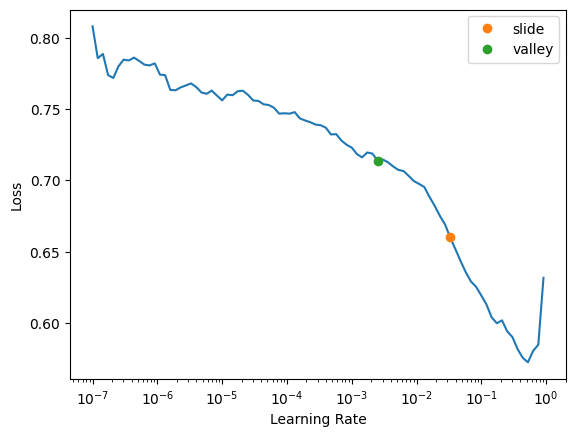

In [26]:
#learn.lr_find()
learn.lr_find(suggest_funcs=(slide,valley))

In [27]:
%%time
learn.fit_one_cycle(2, 1.089e-3)

epoch,train_loss,valid_loss,roc_auc_score,time
0,0.169677,0.166126,0.957182,01:41
1,0.160111,0.158971,0.960372,01:40


CPU times: user 3min 19s, sys: 1.79 s, total: 3min 21s
Wall time: 3min 21s


In [28]:
dl = test_dl

In [29]:
learn.save('nn_pnality_tp_pd')

Path('models/nn_pnality_tp_pd.pth')

In [30]:
nn_preds = learn.get_preds(dl=dl)
nn_preds_x = learn.get_preds()[0]
a_preds, _ = learn.get_preds(dl=dl)
nn_preds_y = a_preds.squeeze(1)
nn_preds_proba = (a_preds[:, 1])

In [31]:
a_preds.shape

torch.Size([250000, 2])

In [32]:
nn_preds_y.shape,sub_df.shape

(torch.Size([250000, 2]), (250000, 2))

In [33]:
nn_preds_x

tensor([[6.8092e-02, 9.3191e-01],
        [9.9986e-01, 1.4376e-04],
        [6.7266e-01, 3.2734e-01],
        ...,
        [9.9982e-01, 1.8397e-04],
        [9.9934e-01, 6.5705e-04],
        [9.9975e-01, 2.4889e-04]])

In [34]:
nn_preds_y

tensor([[9.9543e-01, 4.5659e-03],
        [7.5671e-01, 2.4329e-01],
        [9.9985e-01, 1.4588e-04],
        ...,
        [1.4735e-01, 8.5265e-01],
        [9.9761e-01, 2.3940e-03],
        [8.2861e-01, 1.7139e-01]])

In [35]:
a_preds

tensor([[9.9543e-01, 4.5659e-03],
        [7.5671e-01, 2.4329e-01],
        [9.9985e-01, 1.4588e-04],
        ...,
        [1.4735e-01, 8.5265e-01],
        [9.9761e-01, 2.3940e-03],
        [8.2861e-01, 1.7139e-01]])

In [36]:
nn_preds_proba

tensor([4.5659e-03, 2.4329e-01, 1.4588e-04,  ..., 8.5265e-01, 2.3940e-03,
        1.7139e-01])

In [37]:
#final_preds = torch.round(a_preds).long()
final_preds = a_preds[:,1]
final_preds

tensor([4.5659e-03, 2.4329e-01, 1.4588e-04,  ..., 8.5265e-01, 2.3940e-03,
        1.7139e-01])

In [38]:
final_preds.shape

torch.Size([250000])

In [39]:
!rm submission.csv
sub_df['y'] = final_preds
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

rm: cannot remove 'submission.csv': No such file or directory


,y
id,
750000,0.004566
750001,0.243290
750002,0.000146
750003,0.000117
750004,0.015170
...,...
999995,0.000097
999996,0.090332
999997,0.852652


## Decision Trees

### Random Forests

In [40]:
%%time
rf = RandomForestClassifier(100, min_samples_leaf=3)
rf_model = rf.fit(X_train, y_train);

rf_preds = tensor(rf_model.predict(test_dl.xs))
rf_preds_probs = tensor(rf_model.predict_proba(test_dl.xs))[:, 1]

rf_preds_x = tensor(rf_model.predict(X_test))
rf_preds_proba = tensor(rf_model.predict_proba(X_test))[:, 1]

#mse = mean_absolute_error(y_test, rf_preds_x)
#rmse = np.sqrt(mse)

#accuracy_score(y_test,rf_preds_x)
rf_score = roc_auc_score(y_test,rf_preds_proba)
rf_score

CPU times: user 2min 23s, sys: 279 ms, total: 2min 23s
Wall time: 2min 23s


0.9640305623621466

In [41]:
rf_preds_probs,rf_preds_probs.shape

(tensor([0.0014, 0.1789, 0.0017,  ..., 0.6905, 0.0053, 0.0927]),
 torch.Size([250000]))

In [42]:
rf_preds_probs 

tensor([0.0014, 0.1789, 0.0017,  ..., 0.6905, 0.0053, 0.0927])

In [43]:
def rf_feat_importance(m, train_subset):
    return pd.DataFrame({'cols':train_subset.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [44]:
fi = rf_feat_importance(rf_model, X_train)
#fi[:10]

fi

,cols,imp
12,duration,0.464523
10,balance,0.096365
7,month,0.069611
9,age,0.068426
11,day,0.056297
8,poutcome,0.041702
4,housing,0.036584
14,pdays,0.035131
6,contact,0.031055
0,job,0.026513


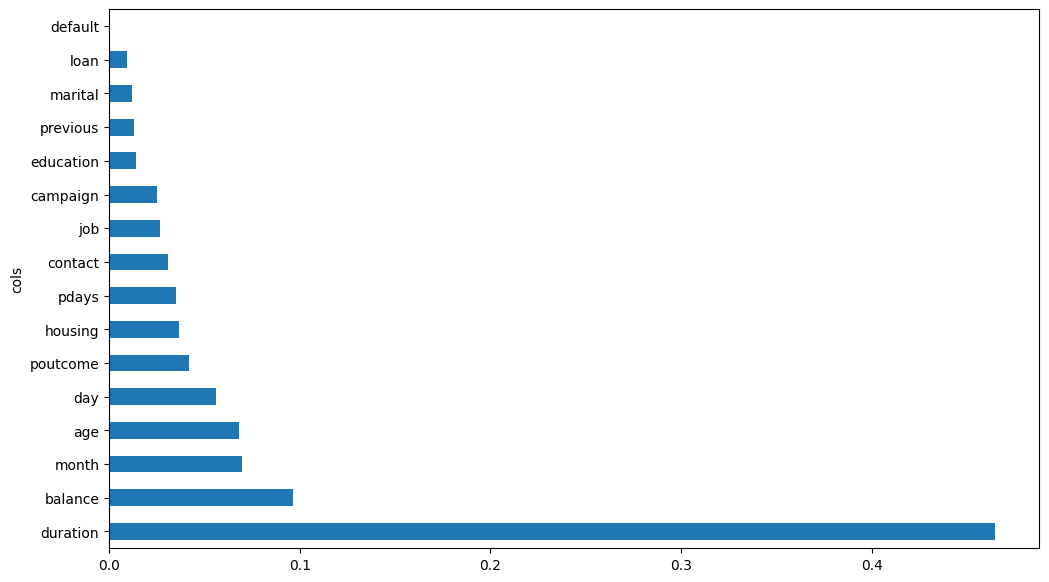

In [45]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

#plot_fi(fi[:30]);
plot_fi(fi);

#### Cross validation - RF

In [46]:
rf = RandomForestClassifier(100, min_samples_leaf=3)
rf

RandomForestClassifier(min_samples_leaf=3)

In [47]:
rf_oof_predictions, rf_test_predictions, rf_mean_score, rf_fold_scores = cross_val_predict(
    model=rf, X_train=X_train, y_train=y_train, X_test=X_test, 
)

Training fold 1/5...
Fold 1 roc_auc: 0.963070
Training fold 2/5...
Fold 2 roc_auc: 0.963842
Training fold 3/5...
Fold 3 roc_auc: 0.963881
Training fold 4/5...
Fold 4 roc_auc: 0.963103
Training fold 5/5...
Fold 5 roc_auc: 0.962969

Mean roc_auc: 0.963373


In [48]:
rf_oof_predictions.shape, rf_test_predictions.shape

((600000,), (150000,))

In [49]:
rf_oof_predictions

array([0.00000000e+00, 0.00000000e+00, 7.36668834e-02, ..., 2.34197484e-04, 5.35714286e-03, 4.28004652e-01])

In [50]:
rf_test_predictions

array([9.65320996e-01, 1.34867828e-03, 3.34931306e-01, ..., 1.21300340e-05, 1.21300340e-05, 2.03625823e-03])

In [51]:
rf_mean_score, rf_fold_scores

(0.9633730997491157,
 [0.9630702055909659,
  0.9638418791639592,
  0.9638811652408653,
  0.9631030481872863,
  0.962969200562501])

In [52]:
!rm submission.csv
sub_df['y'] = rf_preds_probs
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.001422
750001,0.178939
750002,0.001667
750003,0.000000
750004,0.046075
...,...
999995,0.000000
999996,0.212929
999997,0.690515


## Gradient Boosting

### XGBoost

In [53]:
%%time
xgb_model = xgb.XGBClassifier()
xgb_model = xgb_model.fit(X_train, y_train)

xgb_preds = tensor(xgb_model.predict(test_dl.xs))
xgb_preds_proba = tensor(xgb_model.predict_proba(test_dl.xs))[:, 1]

xgb_preds_x = tensor(xgb_model.predict(X_test))
xgb_preds_x_proba = tensor(xgb_model.predict_proba(X_test))[:, 1]

xgb_score = roc_auc_score(y_test,xgb_preds_x_proba)
xgb_score

CPU times: user 8.16 s, sys: 69 ms, total: 8.22 s
Wall time: 4.29 s


0.9663295620452735

In [54]:
xgb_preds_proba

tensor([2.3141e-03, 1.3695e-01, 3.0007e-04,  ..., 9.4277e-01, 7.0165e-04,
        1.6866e-01])

#### XGB Feature Importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

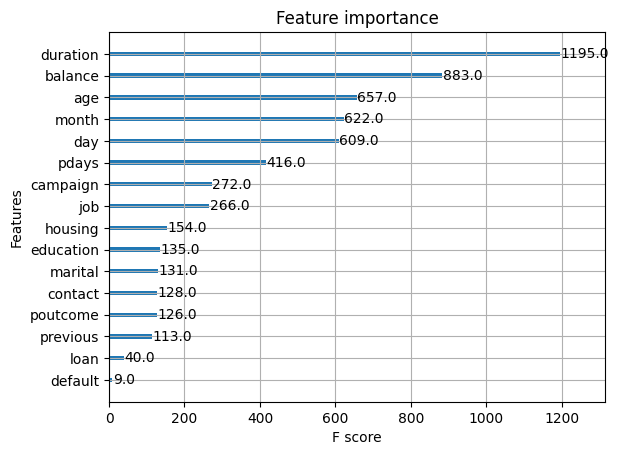

In [55]:
#plot_importance(xgb_model.fit(X_train, y_train))
plot_importance(xgb_model)

#### Cross Validation - XGBoost

In [56]:
xgb_model = xgb.XGBClassifier()
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [57]:
xgb_oof_predictions, xgb_test_predictions, xgb_mean_score, xgb_fold_scores = cross_val_predict(
    model=xgb_model, X_train=X_train, y_train=y_train, X_test=X_test, 
)

Training fold 1/5...
Fold 1 roc_auc: 0.965195
Training fold 2/5...
Fold 2 roc_auc: 0.965950
Training fold 3/5...
Fold 3 roc_auc: 0.966080
Training fold 4/5...
Fold 4 roc_auc: 0.965371
Training fold 5/5...
Fold 5 roc_auc: 0.965888

Mean roc_auc: 0.965697


In [58]:
xgb_oof_predictions

array([4.34994472e-05, 3.64972046e-04, 5.97072989e-02, ..., 2.10413069e-04, 1.57228403e-03, 4.13020074e-01])

In [59]:
xgb_test_predictions

array([9.86724660e-01, 1.75572362e-03, 2.80774944e-01, ..., 6.06515814e-05, 3.07258168e-04, 3.77789096e-04])

In [60]:
xgb_mean_score

0.9656968741844091

In [61]:
 xgb_fold_scores

[0.9651945052766029,
 0.9659503098805383,
 0.9660803815823693,
 0.9653710642055827,
 0.9658881099769521]

In [62]:
!rm submission.csv
sub_df['y'] = xgb_preds_proba
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.002314
750001,0.136947
750002,0.000300
750003,0.000078
750004,0.016155
...,...
999995,0.000151
999996,0.113440
999997,0.942773


### LGBM

In [63]:
%%time
#ds subset
lgbm_model = lgb.LGBMClassifier()
lgbm_model = lgbm_model.fit(X_train, y_train)

#test set preds
lgbm_preds = tensor(lgbm_model.predict(test_dl.xs))
lgbm_preds_prob = tensor(lgbm_model.predict_proba(test_dl.xs))
lgbm_preds_proba = (lgbm_preds_prob[:, 1])

#validation set preds
lgbm_preds_x = tensor(lgbm_model.predict(X_test))
lgbm_preds_x_prob = tensor(lgbm_model.predict_proba(X_test))
lgbm_positive_preds_x = (lgbm_preds_x_prob[:, 1])

lgbm_score = roc_auc_score(y_test,lgbm_positive_preds_x)
lgbm_score

#lgb_preds_x_prob = tensor(lgb_model.predict_proba(X_test))

lgbm_score = roc_auc_score(y_test,lgbm_positive_preds_x)
lgbm_score

[LightGBM] [Info] Number of positive: 72474, number of negative: 527526
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029984 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1008
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120790 -> initscore=-1.984970
[LightGBM] [Info] Start training from score -1.984970
CPU times: user 13.6 s, sys: 130 ms, total: 13.7 s
Wall time: 7.04 s


0.9649215638925313

In [64]:
lgbm_preds_prob,lgbm_preds_prob.shape

(tensor([[0.9961, 0.0039],
         [0.8584, 0.1416],
         [0.9988, 0.0012],
         ...,
         [0.2896, 0.7104],
         [0.9987, 0.0013],
         [0.8895, 0.1105]]),
 torch.Size([250000, 2]))

#### LGBM Feature Importance

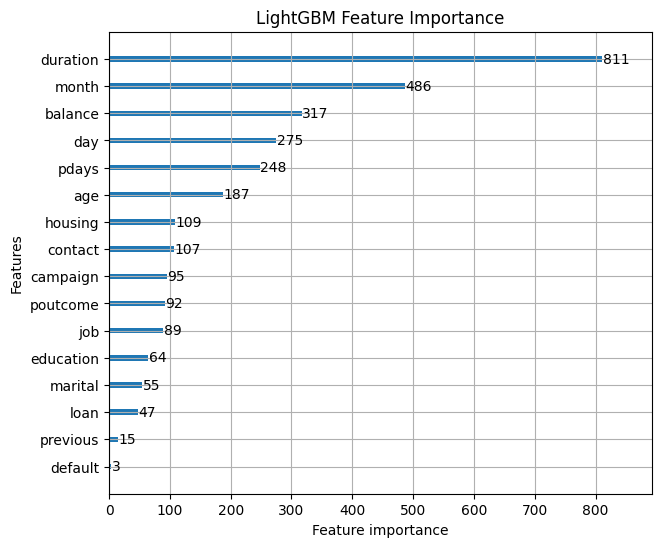

In [65]:
# Plot feature importance without using Gain or split
lgb.plot_importance(lgbm_model, figsize=(7,6), title="LightGBM Feature Importance")
#plt.title('LGBM Feature Importance')
#plt.tight_layout()
plt.show()

#### Cross Validation - LGBM

In [66]:
lgbm_model = lgb.LGBMClassifier()
lgbm_model

LGBMClassifier()

In [67]:
lgbm_oof_predictions, lgbm_test_predictions, lgbm_mean_score, lgbm_fold_scores = cross_val_predict(
    model=lgbm_model, X_train=X_train, y_train=y_train, X_test=X_test,
)

Training fold 1/5...
[LightGBM] [Info] Number of positive: 57980, number of negative: 422020
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1008
[LightGBM] [Info] Number of data points in the train set: 480000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120792 -> initscore=-1.984955
[LightGBM] [Info] Start training from score -1.984955
Fold 1 roc_auc: 0.963955
Training fold 2/5...
[LightGBM] [Info] Number of positive: 57979, number of negative: 422021
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1008
[LightGBM] [Info] Number of data points i

In [68]:
lgbm_oof_predictions

array([1.48240817e-04, 1.22999369e-03, 8.48370219e-02, ..., 4.99709836e-04, 4.30234578e-03, 4.89538306e-01])

In [69]:
lgbm_test_predictions

array([9.71387379e-01, 4.81306193e-03, 3.11994751e-01, ..., 4.29105558e-04, 1.49198155e-03, 8.07986314e-04])

In [70]:
 lgbm_mean_score

0.9647077038182241

In [71]:
lgbm_fold_scores

[0.9639545218965965,
 0.9651968541909319,
 0.9651450999503873,
 0.9643510180238446,
 0.9648910250293604]

In [72]:
!rm submission.csv
sub_df['y'] = lgbm_preds_proba
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.003857
750001,0.141644
750002,0.001233
750003,0.000749
750004,0.025418
...,...
999995,0.000337
999996,0.106742
999997,0.710386


### CatBoost

In [73]:
%%time
#using full ds
cat_model = CatBoostClassifier()
cat_model = cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)

#test set preds
cat_preds = tensor(cat_model.predict(test_dl.xs))
cat_preds_probs = tensor(cat_model.predict_proba(test_dl.xs))[:, 1]
#cat_preds_final = cat_preds.squeeze(1)

#validation set preds
cat_preds_x = tensor(cat_model.predict(X_test))
cat_preds_x_proba = tensor(cat_model.predict_proba(X_test))[:, 1]

#cat_preds_x_final = cat_preds_x.squeeze(1)

#accuracy_score(y_test,cat_preds_x)

cat_score = roc_auc_score(y_test,cat_preds_x_proba)
cat_score

CPU times: user 4min 21s, sys: 10.7 s, total: 4min 32s
Wall time: 1min 9s


0.9675784944731506

#### CatBoost Feature Importance

In [74]:
feature_importance_default = cat_model.get_feature_importance()
feature_names = X_train.columns

# Create DataFrame for better visualization
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance_default
}).sort_values('importance', ascending=False)

print("=== Default Feature Importance (PredictionValuesChange) ===")
print(importance_df.head(10))

=== Default Feature Importance (PredictionValuesChange) ===
     feature  importance
12  duration   46.173912
6    contact   10.823569
7      month    9.638773
10   balance    7.731194
4    housing    5.580415
11       day    4.422003
13  campaign    2.583377
9        age    2.399283
14     pdays    2.269548
8   poutcome    1.734086


#### Cross validation - CatBoost

In [75]:
cat_model = CatBoostClassifier()
cat_model

In [76]:
cat_oof_predictions, cat_test_predictions, cat_mean_score, cat_fold_scores = cross_val_predict(
    model=cat_model, X_train=X_train, y_train=y_train, X_test=X_test, 
)

Training fold 1/5...
Learning rate set to 0.143822
0:	learn: 0.4840668	total: 57.6ms	remaining: 57.6s
1:	learn: 0.3654755	total: 110ms	remaining: 54.9s
2:	learn: 0.3001957	total: 169ms	remaining: 56.1s
3:	learn: 0.2630889	total: 222ms	remaining: 55.3s
4:	learn: 0.2402262	total: 277ms	remaining: 55.1s
5:	learn: 0.2254170	total: 331ms	remaining: 54.8s
6:	learn: 0.2158938	total: 384ms	remaining: 54.4s
7:	learn: 0.2088826	total: 442ms	remaining: 54.8s
8:	learn: 0.2049777	total: 496ms	remaining: 54.6s
9:	learn: 0.2010724	total: 550ms	remaining: 54.5s
10:	learn: 0.1974787	total: 605ms	remaining: 54.4s
11:	learn: 0.1950170	total: 661ms	remaining: 54.4s
12:	learn: 0.1930605	total: 717ms	remaining: 54.4s
13:	learn: 0.1916039	total: 774ms	remaining: 54.5s
14:	learn: 0.1900578	total: 828ms	remaining: 54.4s
15:	learn: 0.1882883	total: 885ms	remaining: 54.4s
16:	learn: 0.1871934	total: 937ms	remaining: 54.2s
17:	learn: 0.1856150	total: 990ms	remaining: 54s
18:	learn: 0.1841439	total: 1.04s	remainin

## Ensembling

### Averaging

#### CatBoost + XGBoost

In [77]:
cat_xgb_preds = (xgb_preds_proba + cat_preds_probs)/ 2
cat_xgb_preds 

tensor([3.0080e-03, 1.1052e-01, 2.5606e-04,  ..., 8.6895e-01, 7.4203e-04,
        1.6436e-01])

In [78]:
cat_xgb_x_preds = (xgb_preds_x_proba + cat_preds_x_proba)/ 2
cat_xgb_x_preds 

tensor([9.8508e-01, 2.2860e-03, 3.3034e-01,  ..., 7.1802e-05, 1.9994e-04,
        2.1483e-04])

In [79]:
cat_xgb_score = roc_auc_score(y_test,cat_xgb_x_preds)
cat_xgb_score

0.9676797715697854

#### CatBoost + LGBM

In [80]:
cat_lgbm_preds = (lgbm_preds_proba + cat_preds_probs)/ 2
cat_lgbm_preds 

tensor([3.7793e-03, 1.1286e-01, 7.2264e-04,  ..., 7.5276e-01, 1.0302e-03,
        1.3529e-01])

In [81]:
cat_lgbm_x_preds = (lgbm_positive_preds_x + cat_preds_x_proba)/ 2
cat_lgbm_x_preds.shape

torch.Size([150000])

In [82]:
cat_lgbm_score = roc_auc_score(y_test,cat_lgbm_x_preds)
cat_lgbm_score

0.9672542646361434

#### XGBoost + LGBM

In [83]:
lgbm_xgb_preds = (lgbm_preds_proba +  xgb_preds_proba)/ 2
lgbm_xgb_preds 

tensor([3.0854e-03, 1.3930e-01, 7.6664e-04,  ..., 8.2658e-01, 9.8981e-04,
        1.3959e-01])

In [84]:
lgbm_xgb_preds_x = (lgbm_positive_preds_x + xgb_preds_x_proba)/ 2
lgbm_xgb_score = roc_auc_score(y_test,lgbm_xgb_preds_x)
lgbm_xgb_score

0.9665489111453698

In [85]:
!rm submission.csv
sub_df['y'] = lgbm_xgb_preds 
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.003085
750001,0.139296
750002,0.000767
750003,0.000414
750004,0.020787
...,...
999995,0.000244
999996,0.110091
999997,0.826580


#### CatBoost + LGBM + XGBoost

In [86]:
cat_lgbm_xgb_preds = (lgbm_preds_proba + cat_preds_probs + xgb_preds_proba)/ 3
cat_lgbm_xgb_preds 

tensor([3.2909e-03, 1.2089e-01, 5.8178e-04,  ..., 8.1610e-01, 9.2068e-04,
        1.4641e-01])

In [87]:
cat_lgbm_xgb_preds_x = (lgbm_positive_preds_x + cat_preds_x_proba + xgb_preds_x_proba)/ 3
cat_lgbm_xgb_score = roc_auc_score(y_test,cat_lgbm_xgb_preds_x)
cat_lgbm_xgb_score

0.9674606241440019

### Stacking

In [88]:
stacking_estimators = [
    ('cat_boost',cat_model),
    #('rf',rf_model),
    ('lgbm',lgbm_model),
    ('xgb',xgb_model),
]

#stacking_classifier_cat_xgb_lgbm= StackingClassifier(
    #estimators=stacking_estimators,
    #final_estimator=LogisticRegression(),
    #cv=5
#)
stacking_classifier_cat_lgbm= StackingClassifier(
    estimators=stacking_estimators,
    final_estimator=lgb.LGBMClassifier(),
    cv=5
)
stacking_classifier_cat_lgbm.fit(X_train, y_train)


stacking_preds_cat_lgbm = (stacking_classifier_cat_lgbm.predict_proba(test_dl.xs))[:,1]
stacking_preds_cat_lgbm_x = (stacking_classifier_cat_lgbm.predict_proba(X_test))[:,1]

stacking_score_cat_lgbm = roc_auc_score(y_test, stacking_preds_cat_lgbm_x)

print(f"Final Stacking Classifier ROC_AUC on test set: {stacking_score_cat_lgbm}")

print(f"Final Stacking Classifier ROC_AUC on test set: {stacking_score_cat_lgbm}")

Learning rate set to 0.158199
0:	learn: 0.4653267	total: 72.8ms	remaining: 1m 12s
1:	learn: 0.3468199	total: 138ms	remaining: 1m 8s
2:	learn: 0.2854513	total: 208ms	remaining: 1m 9s
3:	learn: 0.2504904	total: 274ms	remaining: 1m 8s
4:	learn: 0.2315375	total: 339ms	remaining: 1m 7s
5:	learn: 0.2177877	total: 400ms	remaining: 1m 6s
6:	learn: 0.2108075	total: 466ms	remaining: 1m 6s
7:	learn: 0.2050171	total: 530ms	remaining: 1m 5s
8:	learn: 0.2003613	total: 598ms	remaining: 1m 5s
9:	learn: 0.1966730	total: 669ms	remaining: 1m 6s
10:	learn: 0.1940215	total: 729ms	remaining: 1m 5s
11:	learn: 0.1909454	total: 794ms	remaining: 1m 5s
12:	learn: 0.1889794	total: 856ms	remaining: 1m 5s
13:	learn: 0.1874574	total: 925ms	remaining: 1m 5s
14:	learn: 0.1859146	total: 992ms	remaining: 1m 5s
15:	learn: 0.1848584	total: 1.06s	remaining: 1m 5s
16:	learn: 0.1836589	total: 1.12s	remaining: 1m 4s
17:	learn: 0.1826733	total: 1.19s	remaining: 1m 5s
18:	learn: 0.1818459	total: 1.26s	remaining: 1m 4s
19:	learn

In [89]:
stacking_preds_cat_lgbm.shape

(250000,)

In [90]:
stacking_preds_cat_lgbm = torch.tensor(stacking_preds_cat_lgbm)

In [91]:
stacking_preds_cat_lgbm

tensor([2.3563e-02, 9.1835e-02, 4.2870e-05,  ..., 8.4129e-01, 7.3354e-05,
        1.7931e-01], dtype=torch.float64)

In [92]:
!rm submission.csv
sub_df['y'] = stacking_preds_cat_lgbm 
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.023563
750001,0.091835
750002,0.000043
750003,0.000025
750004,0.014358
...,...
999995,0.000011
999996,0.073298
999997,0.841286


## AutoML

### AutoGluon

In [93]:
target = 'y'
eval_metric = 'roc_auc'
#train_data = train
train_data = train_df
Time_limit = 3600*10
#Time_limit = 3600
problem_type='binary'

In [94]:
%%time
predictor = TabularPredictor(label=target, eval_metric=eval_metric, verbosity=1).fit(
    train_data, presets='best_quality', time_limit=Time_limit,
    ag_args_fit={'num_gpus': 2}
    #ag_args_fit={
        #'num_gpus': 2, 
        #'stopping_metric': 'log_loss'
    
    #}
)

results = predictor.fit_summary()

No path specified. Models will be saved in: "AutogluonModels/ag-20250818_144631"
2025-08-18 14:46:31,826	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.8.5 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-08-18 14:46:35,294	INFO worker.py:1743 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 
(_ray_fit pid=1640) 	Training S1F1 with GPU, note that this may negatively impact model quality compared to CPU training.
(_ray_fit pid=1640) 1 warning generated.
(_ray_fit pid=1640) 1 warning generated.
(_ray_fit pid=1640) 1 warning generated.
(_ray_fit pid=1640) 1 warning generated.
(_ray_fit pid=1640) 1 warning generated.
(_ray_fit pid=1640) 1 warning generated.
(_ray_fit pid=1640) 1 warning generated.
(_ray_fit pid=1640) 1 warning generated.
(_ray_fit pid=1640) 1 warning generated.
(_ray_fit pid=1640) 1 warning generated.
(_ray_fit pid=1640) 1 warning generated.
(_ray_fit pid=1640) 1 

*** Summary of fit() ***
Estimated performance of each model:
                        model  score_val eval_metric  pred_time_val      fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0         WeightedEnsemble_L3   0.970523     roc_auc    1065.572682  24292.215535                0.136823          95.856472            3       True         32
1              XGBoost_BAG_L2   0.970334     roc_auc    1012.146670  17622.010496                2.963093         118.553213            2       True         26
2        LightGBMLarge_BAG_L2   0.970217     roc_auc    1017.043117  17751.285683                7.859540         247.828400            2       True         28
3             LightGBM_BAG_L2   0.970190     roc_auc    1013.602696  17658.569254                4.419118         155.111971            2       True         19
4           LightGBMXT_BAG_L2   0.970158     roc_auc    1035.430271  17885.215842               26.246694         381.758559            2 

In [95]:
%%time
#predictor = TabularPredictor(label=target, eval_metric=eval_metric,verbosity=1,problem_type=problem_type).fit(
    #train_data, presets='best_quality',excluded_model_types=['KNN'], time_limit=Time_limit,
    #ag_args_fit={
        #'num_gpus': 2, 
        #'stopping_metric': 'log_loss'
    #}
#)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.3 µs


In [96]:
%%time
results = predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                        model  score_val eval_metric  pred_time_val      fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0         WeightedEnsemble_L3   0.970523     roc_auc    1065.572682  24292.215535                0.136823          95.856472            3       True         32
1              XGBoost_BAG_L2   0.970334     roc_auc    1012.146670  17622.010496                2.963093         118.553213            2       True         26
2        LightGBMLarge_BAG_L2   0.970217     roc_auc    1017.043117  17751.285683                7.859540         247.828400            2       True         28
3             LightGBM_BAG_L2   0.970190     roc_auc    1013.602696  17658.569254                4.419118         155.111971            2       True         19
4           LightGBMXT_BAG_L2   0.970158     roc_auc    1035.430271  17885.215842               26.246694         381.758559            2 

In [97]:
%%time
predictor.leaderboard()

CPU times: user 7.23 ms, sys: 1.96 ms, total: 9.19 ms
Wall time: 8.53 ms


,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,0.970523,roc_auc,1065.572682,24292.215535,0.136823,95.856472,3,True,32
1,XGBoost_BAG_L2,0.970334,roc_auc,1012.146670,17622.010496,2.963093,118.553213,2,True,26
2,LightGBMLarge_BAG_L2,0.970217,roc_auc,1017.043117,17751.285683,7.859540,247.828400,2,True,28
3,LightGBM_BAG_L2,0.970190,roc_auc,1013.602696,17658.569254,4.419118,155.111971,2,True,19
4,LightGBMXT_BAG_L2,0.970158,roc_auc,1035.430271,17885.215842,26.246694,381.758559,2,True,18
5,NeuralNetFastAI_BAG_L2,0.970142,roc_auc,1015.435011,20866.462346,6.251434,3363.005063,2,True,25
6,CatBoost_BAG_L2,0.970049,roc_auc,1009.976864,17746.742666,0.793287,243.285383,2,True,22
7,NeuralNetTorch_BAG_L2,0.969895,roc_auc,1016.771569,19995.764684,7.587991,2492.307401,2,True,27
8,NeuralNetTorch_r79_BAG_L2,0.969795,roc_auc,1017.125081,17974.614487,7.941504,471.157204,2,True,30
9,RandomForestEntr_BAG_L2,0.969764,roc_auc,1040.773801,17974.664986,31.590223,471.207703,2,True,21


In [98]:
%%time
#autogluon_preds = predictor.predict(test_df)
autogluon_preds_proba = predictor.predict_proba(test_df)
autogluon_preds_proba.head(5)  

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you t

CPU times: user 40min 46s, sys: 10.8 s, total: 40min 57s
Wall time: 20min 38s


,0,1
id,,
750000,0.999448,0.000552
750001,0.928946,0.071054
750002,0.999817,0.000183
750003,0.999852,0.000148
750004,0.991615,0.008385


In [99]:
predictions = autogluon_preds_proba

In [100]:
%%time
#autogluon_preds = predictor.predict(test_df)
autogluon_preds_proba = predictor.predict_proba(test_df, as_multiclass=False)
autogluon_preds_proba.head(5)  

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you t

CPU times: user 40min 45s, sys: 11.3 s, total: 40min 57s
Wall time: 20min 37s


id
750000    0.000552
750001    0.071054
750002    0.000183
750003    0.000148
750004    0.008385
Name: y, dtype: float32

In [101]:
autogluon_preds_proba.shape, cat_lgbm_xgb_preds.shape

((250000,), torch.Size([250000]))

In [102]:
autogluon_preds_proba.values

array([5.5190880e-04, 7.1054310e-02, 1.8268648e-04, ..., 7.1680832e-01, 2.7645865e-04, 1.6882421e-01], dtype=float32)

In [103]:
autogluon_preds_proba_values = torch.tensor(autogluon_preds_proba.values)

In [104]:
autogluon_cat_lgbm_xgb_preds = (cat_lgbm_xgb_preds + autogluon_preds_proba_values)/2
autogluon_cat_lgbm_xgb_preds,autogluon_cat_lgbm_xgb_preds.shape

(tensor([1.9214e-03, 9.5973e-02, 3.8223e-04,  ..., 7.6645e-01, 5.9857e-04,
         1.5762e-01]),
 torch.Size([250000]))

In [105]:
!rm submission.csv
sub_df['y'] = autogluon_cat_lgbm_xgb_preds
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.001921
750001,0.095973
750002,0.000382
750003,0.000221
750004,0.015844
...,...
999995,0.000167
999996,0.089812
999997,0.766452


In [106]:
#!rm submission.csv
#submission = pd.read_csv(path/'sample_submission.csv')
#submission['y'] = autogluon_preds_proba
#submission.head()
#submission.to_csv(path/'sample_submission.csv', index=False)

In [107]:
#!rm submission.csv
#submit = pd.read_csv(path/'sample_submission.csv')
#predictions = predictions.reset_index(drop=False)
#submit = pd.DataFrame({'id': predictions['id'], 'Personality': predictions['Personality']})
#submit.set_index('id', inplace=True)
#submit.to_csv('submission.csv', index=True)
#sub = pd.read_csv('submission.csv', index_col='id')
#sub

### Ranking

In [108]:
auc_roc_score = pd.DataFrame({
    'algorithm': ['Random Forest','XGBoost','LGBM','CatBoost',
                  'CatBoost_XGB_average','CatBoost_LGBM_average',
                  'XGB_LGBM_average','CatBoost_XGB_LGBM_average',
                  
                 ],
    'auc_roc_score': [rf_score,xgb_score,lgbm_score,cat_score,
                      cat_xgb_score,cat_lgbm_score,lgbm_xgb_score,
                      cat_lgbm_xgb_score,
                 
           ]
})

auc_roc_sorted = auc_roc_score.sort_values(by='auc_roc_score', ascending=False)
auc_roc_sorted

,algorithm,auc_roc_score
4,CatBoost_XGB_average,0.967680
3,CatBoost,0.967578
7,CatBoost_XGB_LGBM_average,0.967461
5,CatBoost_LGBM_average,0.967254
6,XGB_LGBM_average,0.966549
1,XGBoost,0.966330
2,LGBM,0.964922
0,Random Forest,0.964031


In [109]:
(autogluon_preds_proba.values).shape

(250000,)